In [1]:
from token_shap import TokenSHAP

## Single Sample

In [2]:
model_name = "llama3"
tokenizer_path ="NousResearch/Hermes-2-Theta-Llama-3-8B"
tshap = TokenSHAP(model_name, tokenizer_path)

/opt/anaconda3/envs/opensora/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
%%time
prompt = "why is the sky blue?"
results = tshap.analyze(prompt, sampling_ratio = 0.2)

CPU times: user 481 ms, sys: 175 ms, total: 657 ms
Wall time: 47.7 s


In [4]:
tshap.shapley_values

{'why': 0.1331673528857718,
 'is': 0.16281964289093626,
 'the': 0.20561796267846535,
 'sky': 0.229022879353814,
 'blue': 0.2693721621910127,
 '?': 0.0}

In [5]:
results

,Prompt,Response,Cosine_Similarity
0,is the sky blue?,A simple yet profound question!\n\nThe answer ...,0.687905
1,why the sky blue?,What a great question!\n\nThe color of the sky...,0.809589
2,why is sky blue?,What a great question!\n\nThe short answer is ...,0.811983
3,why is the blue?,The color of the sky can be affected by many f...,0.808328
4,why is the sky?,What a profound and fascinating question!\n\nT...,0.658065
5,why is the sky blue,What a great question!\n\nThe short answer is:...,0.825981
6,is the blue?,I think there might have been a misunderstandi...,0.100193
7,is the sky blue,"A simple yet profound question!\n\nThe answer,...",0.626023
8,the sky?,"I think you meant to ask ""What's in the sky?""\...",0.316080
9,why is?,"I apologize, but it seems like your question g...",0.037603


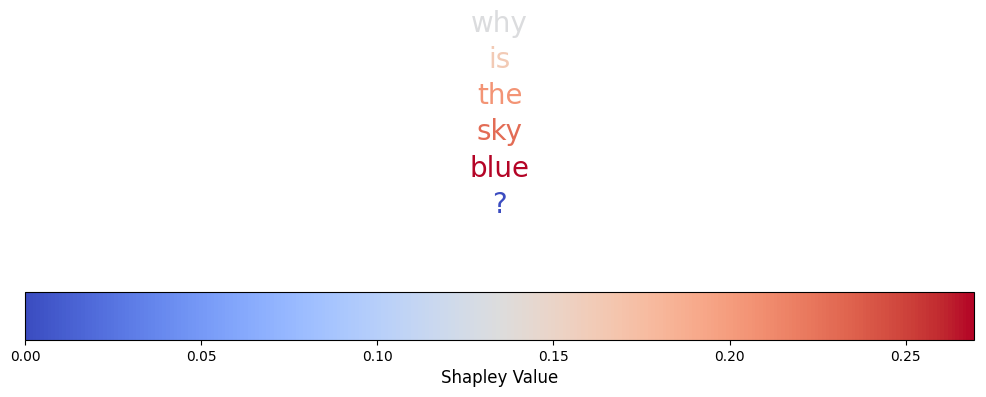

In [6]:
tshap.plot_colored_text()

In [7]:
tshap.print_colored_text()

why is the sky blue ? 


In [16]:
prompt = 'Complete the following code: def quick_sort(arr):'
results = tshap.analyze(prompt, sampling_ratio = 0.2, splitter = ' ')

In [17]:
tshap.shapley_values

{'Complete': 0.0,
 'the': 0.03223020544312804,
 'following': 0.13591245174224045,
 'code:': 0.1875495920150043,
 'def': 0.1217003725792574,
 'quick_sort(arr):': 0.5226073782203698}

In [18]:
tshap.print_colored_text()

Complete the following code: def quick_sort(arr): 


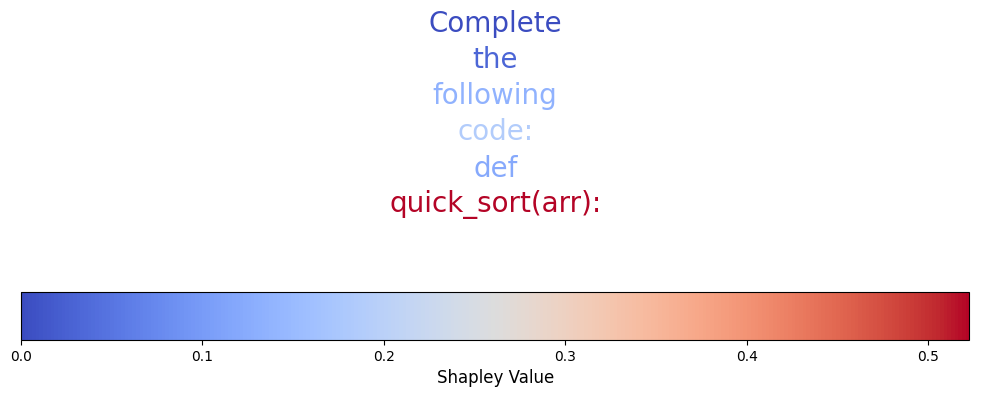

In [19]:
tshap.plot_colored_text()

## Multiple Samples

In [29]:
prompt = "I'm working on a project using PyTorch to build a deep learning model for image classification.\nI'm using the FastAI library to simplify the training process.\nHowever, I'm facing an issue with data augmentation.\nI want to apply various augmentations such as rotation, flipping, and color jittering to my training images.\nCan you help me and write the required code?"
results = tshap.analyze(prompt, splitter ='\n', sampling_ratio = 0.2)

In [30]:
tshap.print_colored_text()

I'm working on a project using PyTorch to build a deep learning model for image classification. I'm using the FastAI library to simplify the training process. However, I'm facing an issue with data augmentation. I want to apply various augmentations such as rotation, flipping, and color jittering to my training images. Can you help me and write the required code? 


In [32]:
tshap.shapley_values

{"I'm working on a project using PyTorch to build a deep learning model for image classification.": 1.0,
 "I'm using the FastAI library to simplify the training process.": 0.0,
 "However, I'm facing an issue with data augmentation.": 0.0,
 'I want to apply various augmentations such as rotation, flipping, and color jittering to my training images.': 0.0,
 'Can you help me and write the required code?': 0.0}